# Inicialización
### Grupo Nor3

In [1]:
from skimage import io
from skimage import data
from skimage import transform as tf
from skimage.feature import (match_descriptors, corner_peaks, corner_harris,
                             plot_matches, BRIEF, ORB)
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

In [45]:
# Paquetes necesarios para la morfología matemática
from skimage.morphology import erosion, dilation, opening, closing
# Elementos estructurales
from skimage.morphology import disk, diamond, ball, rectangle

In [3]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import threshold_otsu, threshold_local, threshold_niblack, threshold_sauvola

from skimage.morphology import label
from skimage.measure import regionprops

In [4]:
# Defino una función para mostrar una imagen por pantalla con el criterio que considero más acertado
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    # El comando que realmente muestra la imagen
    ax.imshow(img,cmap=plt.cm.gray)
    # Para evitar que aparezcan los números en los ejes
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

## Cargar la imagen

In [5]:
pintura_puntos = rgb2gray(io.imread('img/Pintura_Puntos.jpg'))

# Escribe tu código aquí

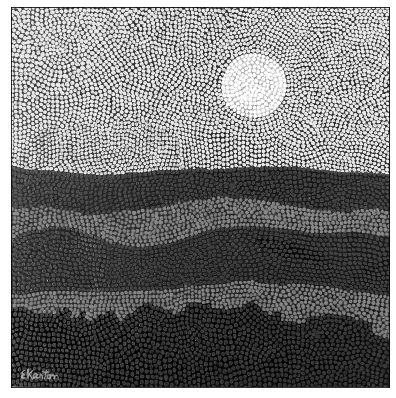

In [6]:
imshow(pintura_puntos)

0.5207471392463235


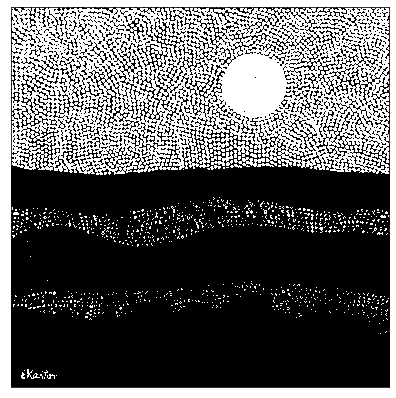

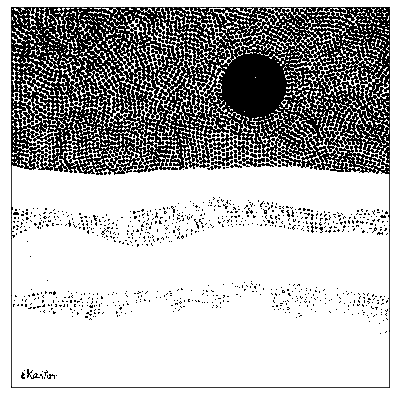

In [19]:
def umbral_imagen(imagen,val_tres):
    print(val_tres)
    img_tres = imagen>val_tres
    imshow(img_tres)
    imshow(~img_tres)    
umbral_imagen(pintura_puntos,threshold_otsu(pintura_puntos))

In [ ]:
def contar_objetos_blanco(imagen):

[[0.68397404 0.68584022 0.68900333 ... 0.73809677 0.73990244 0.7411847 ]
 [0.68591537 0.68778919 0.69097663 ... 0.73867647 0.74045953 0.74173726]
 [0.68932865 0.69121625 0.69441855 ... 0.73985078 0.74159764 0.74285728]
 ...
 [0.26005232 0.26084821 0.2616827  ... 0.14509566 0.14542894 0.14561231]
 [0.25980096 0.26061084 0.26146246 ... 0.14541948 0.14575676 0.1459467 ]
 [0.25958357 0.26040143 0.26125629 ... 0.14558297 0.14591887 0.14610754]]


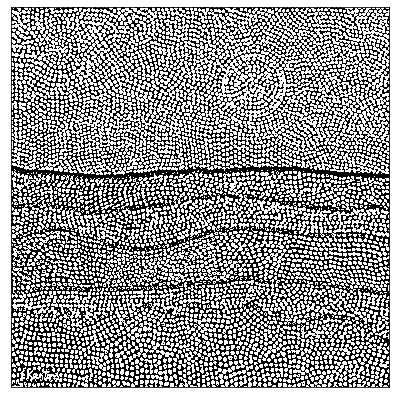

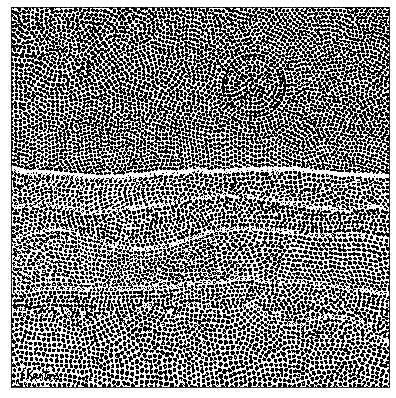

In [28]:
umbral_imagen(pintura_puntos,threshold_local(pintura_puntos,51, 'mean'))

[[0.78778    0.78778    0.78923137 ... 0.84056706 0.85270471 0.85394863]
 [0.79444667 0.79444667 0.79559333 ... 0.84836039 0.85394863 0.85452196]
 [0.79762941 0.79762941 0.79871843 ... 0.85270471 0.85931373 0.86040784]
 ...
 [0.24666824 0.24526157 0.24385412 ... 0.13501922 0.13542275 0.13542275]
 [0.24666824 0.24526157 0.24331216 ... 0.13501922 0.13501922 0.13542275]
 [0.24666824 0.24666824 0.24331216 ... 0.13501922 0.13501922 0.13542275]]


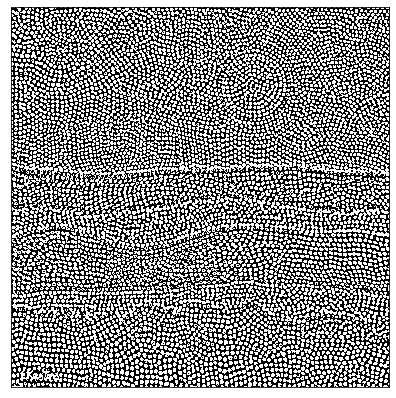

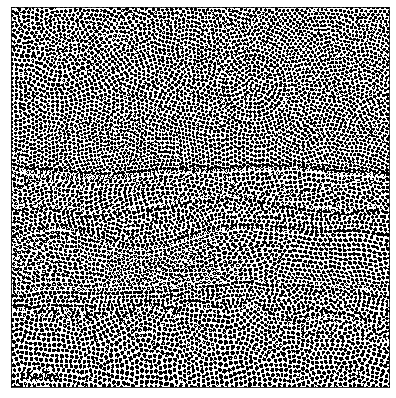

In [29]:
umbral_imagen(pintura_puntos,threshold_local(pintura_puntos,47, 'median'))

In [23]:
threshold_local?

[[0.82264092 0.82128668 0.81851816 ... 0.76193895 0.76245746 0.76229771]
 [0.82165837 0.82033476 0.81761378 ... 0.76182187 0.76237454 0.76223261]
 [0.82018433 0.81889952 0.81622608 ... 0.76188127 0.76253717 0.76247865]
 ...
 [0.25091201 0.25107655 0.25166459 ... 0.13261127 0.13195964 0.13160416]
 [0.2482168  0.24845363 0.24919148 ... 0.13315948 0.13250993 0.13215857]
 [0.2471955  0.24747314 0.24827628 ... 0.13333629 0.13268674 0.13233365]]


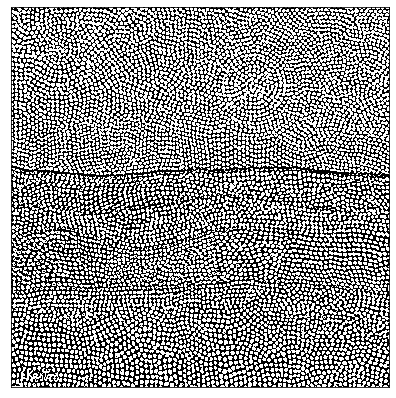

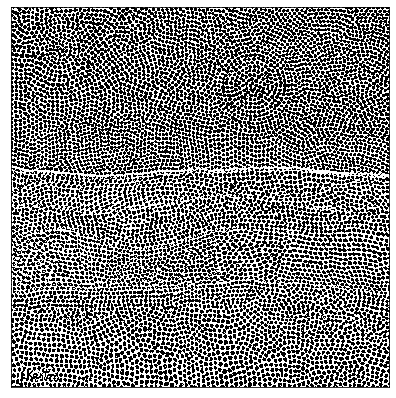

In [53]:
##Adapatativo umbral para cada PIXEL, coge un generico y lo palica para varias imagenes
umbral_imagen(pintura_puntos,threshold_niblack(pintura_puntos,window_size=31, k=1e-4))

In [39]:
def umbral_imagen_umbral(imagen,val_tres):
    print(val_tres)
    img_tres = imagen>val_tres
    return img_tres

[[0.68397404 0.68584022 0.68900333 ... 0.73809677 0.73990244 0.7411847 ]
 [0.68591537 0.68778919 0.69097663 ... 0.73867647 0.74045953 0.74173726]
 [0.68932865 0.69121625 0.69441855 ... 0.73985078 0.74159764 0.74285728]
 ...
 [0.26005232 0.26084821 0.2616827  ... 0.14509566 0.14542894 0.14561231]
 [0.25980096 0.26061084 0.26146246 ... 0.14541948 0.14575676 0.1459467 ]
 [0.25958357 0.26040143 0.26125629 ... 0.14558297 0.14591887 0.14610754]]


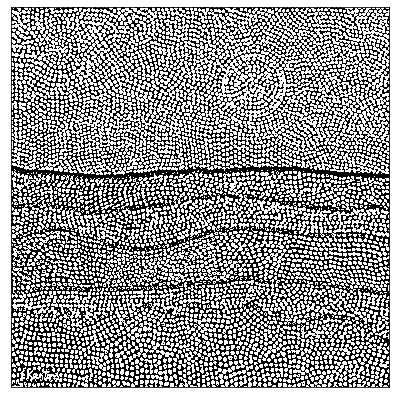

In [40]:
imagen_med=umbral_imagen_umbral(pintura_puntos,threshold_local(pintura_puntos,51, 'mean'))
imshow(imagen_med)

In [64]:
from skimage.morphology import label
from skimage.measure import regionprops
nlabels = label(imagen_med,connectivity=1)
regions = regionprops(nlabels)
print(imagen_med.shape)
print(len(nlabels))
print(len(regions))

(1930, 1920)
1930
5670


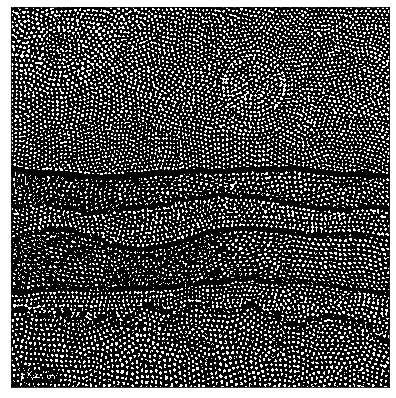

8309


In [68]:
 #erosion, dilation, opening, closing
erosion_disk_img = erosion(imagen_med,disk(3))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

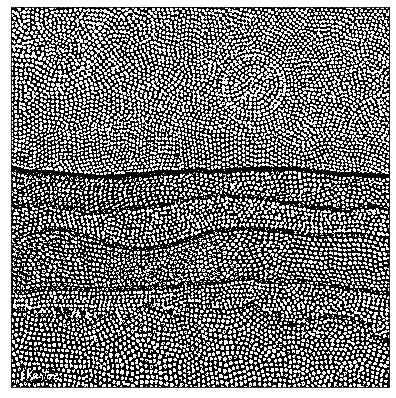

6563


In [69]:
erosion_disk_img = erosion(imagen_med,disk(1))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

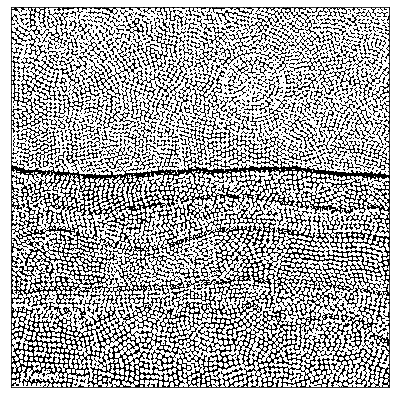

4103


In [72]:
erosion_disk_img = dilation(imagen_med,disk(1))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

### Contar el numero de puntos primero para comparar

In [2]:
erosion_disk_img = opening(imagen_med,disk(2))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

NameError: name 'opening' is not defined

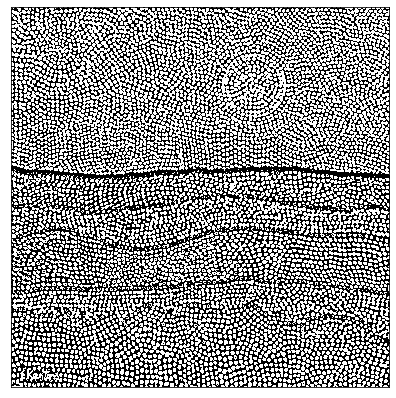

4775


In [74]:
erosion_disk_img = closing(imagen_med,disk(2))
imshow(erosion_disk_img)
nlabels = label(erosion_disk_img,connectivity=1)
regions = regionprops(nlabels)
print(len(regions))

In [1]:
erosion_start_img = erosion(imagen_med,start(1))
imshow(erosion_disk_start)

NameError: name 'erosion' is not defined

# Posible resultado

In [ ]:
Posible resultado